In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.datasets import NoisySpectralSpeechDataset
import torch

In [2]:
arr = np.random.random([5,5])
arr

array([[0.82196977, 0.86777599, 0.38344986, 0.99342482, 0.87993321],
       [0.72130017, 0.37679946, 0.49647927, 0.36552188, 0.96082127],
       [0.92015495, 0.14000158, 0.87318802, 0.10154376, 0.1982605 ],
       [0.94890754, 0.20539817, 0.54219955, 0.61858921, 0.59161815],
       [0.00108831, 0.80659802, 0.08776489, 0.3303368 , 0.40059383]])

In [3]:
mean = arr.mean()
mean

0.5453487590592642

In [4]:
centred_arr = arr - mean
centred_arr.mean()

8.43769498715119e-17

In [5]:
arr_max = np.abs(centred_arr).max()
arr_max

0.5442604533384879

In [6]:
norm_arr = centred_arr / arr_max
norm_arr

array([[ 0.50825116,  0.59241349, -0.29746584,  0.82327507,  0.61475062],
       [ 0.32328531, -0.30968499, -0.08979064, -0.33040593,  0.76337075],
       [ 0.68865226, -0.74476692,  0.60235731, -0.8154276 , -0.63772456],
       [ 0.741481  , -0.62461012, -0.00578622,  0.13456876,  0.08501332],
       [-1.        ,  0.48000779, -0.8407443 , -0.39505343, -0.26596629]])

In [7]:
norm_arr.mean()

1.554312234475219e-16

In [8]:
def norm(arr):
    mean = arr.mean()
    centred_arr = arr - mean
    arr_max = np.abs(centred_arr).max()
    return centred_arr / arr_max

In [9]:
norm(arr)

array([[ 0.50825116,  0.59241349, -0.29746584,  0.82327507,  0.61475062],
       [ 0.32328531, -0.30968499, -0.08979064, -0.33040593,  0.76337075],
       [ 0.68865226, -0.74476692,  0.60235731, -0.8154276 , -0.63772456],
       [ 0.741481  , -0.62461012, -0.00578622,  0.13456876,  0.08501332],
       [-1.        ,  0.48000779, -0.8407443 , -0.39505343, -0.26596629]])

In [10]:
ds = NoisySpectralSpeechDataset(train=False, subsample=1)

In [11]:
t1, t2 = ds[0]
spec1, spec2 = t1.detach().numpy(), t2.detach().numpy()
spec1.shape

(2, 256, 128)

In [12]:
spec1

array([[[-2.19692869e-04,  6.25014945e-04,  2.45093880e-03, ...,
         -1.19251683e-02, -9.81527939e-03, -5.30591700e-04],
        [-4.21637640e-04,  1.25417742e-03,  8.77997663e-04, ...,
          6.78011077e-03,  3.89209180e-03, -1.35651277e-03],
        [ 1.47187657e-05, -1.77633180e-03, -3.03893141e-03, ...,
         -6.68193679e-04,  1.70364883e-03,  2.37039221e-03],
        ...,
        [ 3.54986196e-06, -1.06398446e-07,  1.62722458e-07, ...,
         -1.83854247e-08,  4.79685838e-08, -6.42870868e-09],
        [-3.55063821e-06, -5.13824716e-08,  1.17953896e-07, ...,
         -1.33476759e-08,  1.27001165e-08,  6.85184220e-09],
        [ 3.54272061e-06, -4.57764884e-08,  9.32786932e-08, ...,
         -1.60571165e-08,  1.37892702e-08,  3.41287620e-09]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.92619588e-05,  4.13769996e-03, -3.36125004e-03, ...,
         -3.27023561e-03,  7.06311432e

In [13]:
(spec1 > 0).sum()

32735

In [14]:
(spec1 < 0).sum()

32673

In [15]:
(spec1 == 0).sum()

128

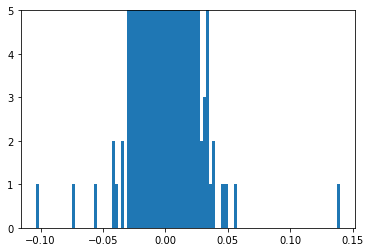

In [16]:
spec_flat = spec1.flatten() 
n, bins, patches = plt.hist(spec_flat, bins=100)
plt.ylim(0, 5)
plt.show()

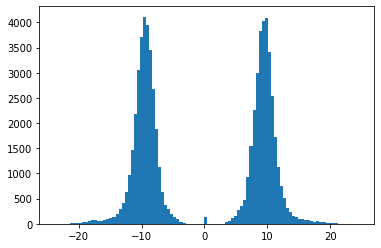

In [17]:
spec_flat = spec1.flatten()
assert (spec_flat > 0).sum() == 32735
spec_log = spec_flat.copy()
spec_log[spec_flat > 0] = np.log(spec_flat[spec_flat > 0])
spec_log[spec_flat < 0] = -1 * np.log(-1 * spec_flat[spec_flat < 0])

n, bins, patches = plt.hist(spec_log,bins=100)
plt.show()

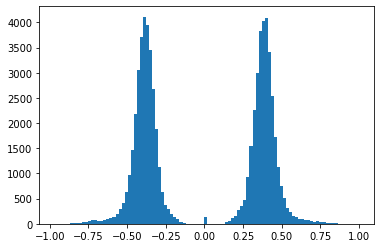

In [18]:
spec_flat = spec1.flatten()
spec_log = spec_flat.copy()
spec_log[spec_flat > 0] = np.log(spec_flat[spec_flat > 0])
spec_log[spec_flat < 0] = -1 * np.log(-1 * spec_flat[spec_flat < 0])

n, bins, patches = plt.hist(norm(spec_log),bins=100)
plt.show()

In [19]:
def logify(arr):
    log_arr = np.zeros(arr.shape)
    log_arr[arr > 0] = np.log(arr[arr > 0])
    log_arr[arr < 0] = -1 * np.log(-1 * arr[arr < 0])
    return log_arr

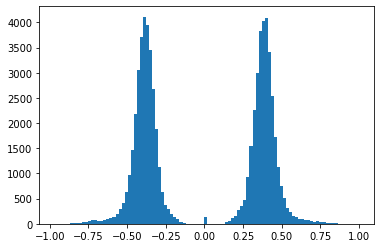

In [20]:
spec_norm = norm(logify(spec1))
spec_flat = spec_norm.flatten()
n, bins, patches = plt.hist(spec_flat,bins=100)
plt.show()

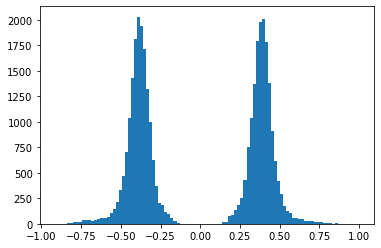

In [21]:
spec_norm = norm(logify(spec1[0, :, :]))
spec_flat = spec_norm.flatten()
n, bins, patches = plt.hist(spec_flat,bins=100)
plt.show()

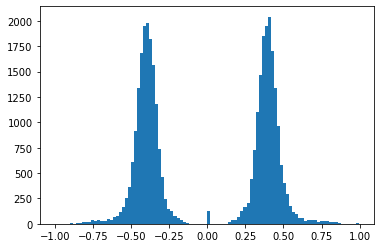

In [22]:
spec_norm = norm(logify(spec1[1, :, :]))
spec_flat = spec_norm.flatten()
n, bins, patches = plt.hist(spec_flat,bins=100)
plt.show()

In [48]:
def logify(arr):
    return np.log(arr)

In [49]:
def delogify(arr):
    return np.exp(arr)

In [50]:
spec_mag = np.sqrt(spec1[0, :, :]**2 + spec1[1, :, :]**2)

In [51]:
spec_mag_flat = spec_mag.flatten()

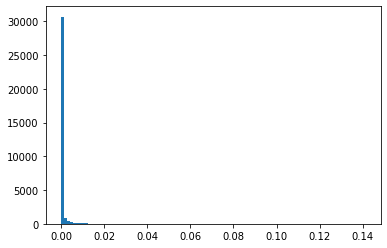

In [56]:
n, bins, patches = plt.hist(spec_mag_flat,bins=100)
# plt.ylim(0, 5)
plt.show()

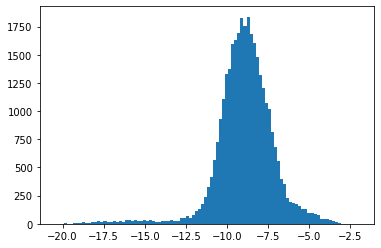

In [55]:
n, bins, patches = plt.hist(logify(spec_mag_flat),bins=100)
# plt.ylim(0, 5)
plt.show()

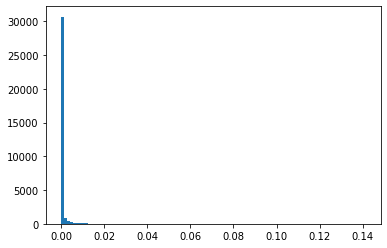

In [57]:
n, bins, patches = plt.hist(delogify(logify(spec_mag_flat)),bins=100)
# plt.ylim(0, 5)
plt.show()